In [1]:
# Imports and settings
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style='darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn.metrics import mean_squared_error

In [2]:
# Reading in the data and selecting the continous features
df = pd.read_csv('data/weatherAUS.csv')
cont_feats = [col for col in df.columns if df[col].dtype != object]

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed = mean_imputer.fit_transform(df[cont_feats])
df_mean_imputed = pd.DataFrame(mean_imputed, columns=cont_feats)

In [5]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
median_imputed = median_imputer.fit_transform(df[cont_feats])
df_median_imputed = pd.DataFrame(median_imputed, columns=cont_feats)

In [6]:
# Iterative Imputation
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
iter_imputed = iter_imputer.fit_transform(df[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

C:\Users\keskh\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


C:\Users\keskh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keskh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keskh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


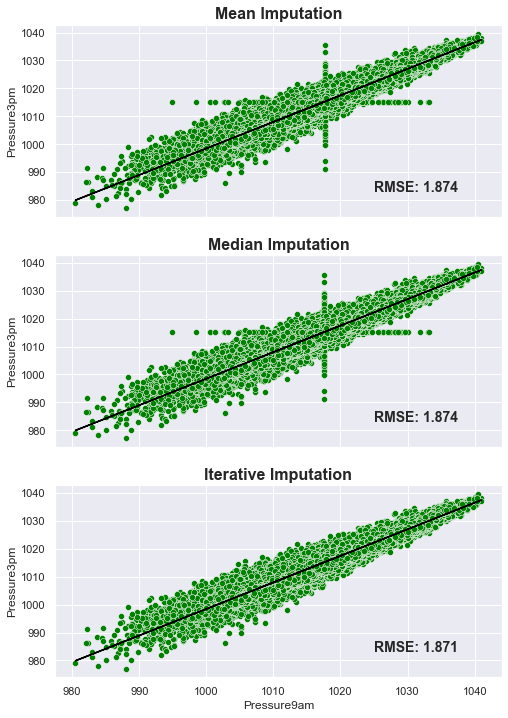

In [7]:
# Plotting a comparison between the different strategies
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 12))
axes = np.reshape(axes, -1)

dfs = [df_mean_imputed, df_median_imputed, df_iter_imputed]
titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

for i, df in enumerate(dfs):
    # Plotting the data
    x = df.Pressure9am
    y = df.Pressure3pm
    sns.scatterplot(x, y, ax=axes[i], color='green')
    
    # Fitting and plotting a linear regression line
    m, b = np.polyfit(x, y, 1)
    linreg = m*x + b
    axes[i].plot(x, linreg, color='black')
    
    # Setting the titles and including the RMSE values
    axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
    rmse = round(mean_squared_error(y, linreg, squared=False), 3)
    axes[i].text(1025, 983, f'RMSE: {rmse}', fontsize=14, fontweight='bold')